In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [2]:
datapath = '../data/'

In [3]:
import glob
files = glob.glob(datapath+'*.csv')
files[0]

'../data/FC3DC207-9459-4CBE-8AB5-0E0AC77D5FEC.csv'

In [4]:
dfs = [pd.read_csv(f) for f in files]
dfs[1] = dfs[1].rename(columns={" timestamp ": "timestamp"})

In [6]:
for df in dfs:
    df['mag'] = np.sqrt(df['x']**2+df['y']**2+df['z']**2)
    df['time'] = pd.to_datetime(df['timestamp'], unit='ms')
dfs[0].head(5)

,timestamp,type,lat,lon,height,accuracy,speed,bearing,x,y,z,mag,time
0,1.431035e+12,gps,41.978753,-87.893018,194.760063,10.0,14.36,139.570312,NaN,NaN,NaN,NaN,2015-05-07 21:46:58.761430
1,1.431035e+12,accelerometer,NaN,NaN,NaN,NaN,NaN,NaN,-0.075974,-0.448395,-0.867188,0.979206,2015-05-07 21:46:58.834430
2,1.431035e+12,accelerometer,NaN,NaN,NaN,NaN,NaN,NaN,-0.079025,-0.435837,-0.919876,1.020966,2015-05-07 21:46:58.932430
3,1.431035e+12,accelerometer,NaN,NaN,NaN,NaN,NaN,NaN,-0.069183,-0.456039,-0.921722,1.030694,2015-05-07 21:46:59.030430
4,1.431035e+12,accelerometer,NaN,NaN,NaN,NaN,NaN,NaN,-0.059341,-0.456772,-0.896149,1.007593,2015-05-07 21:46:59.129430


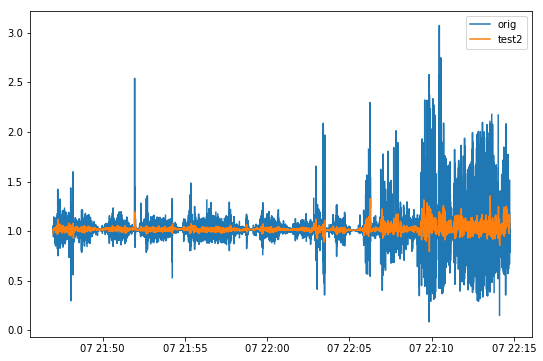

0


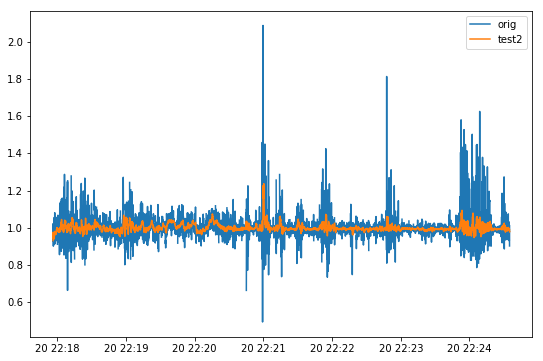

1


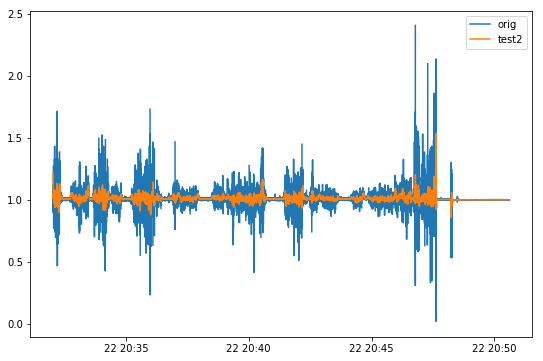

2


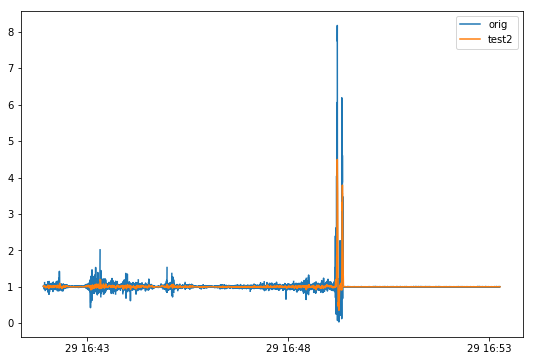

3


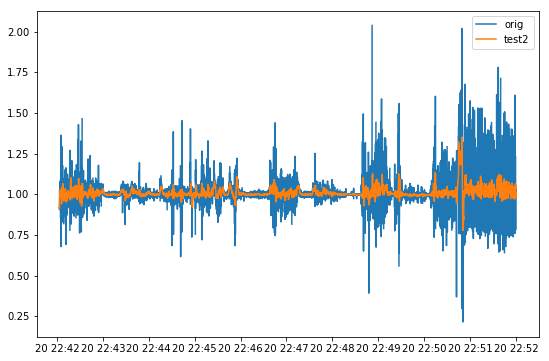

4


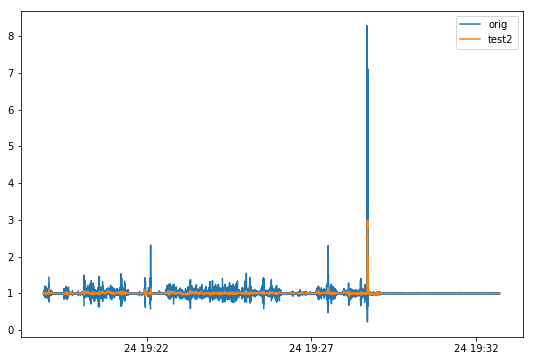

5


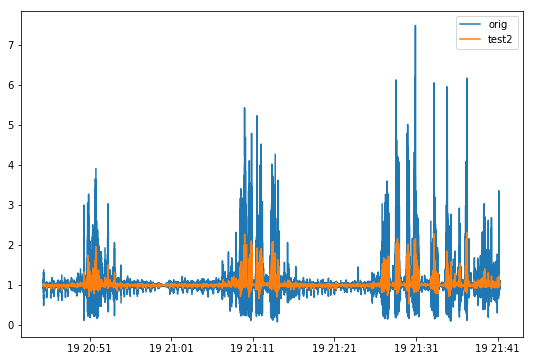

6
6 35359 2015-03-19 21:37:29.228870


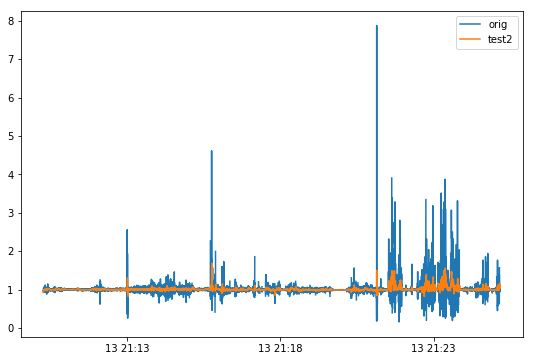

7
7 7616 2015-04-13 21:21:31.568980


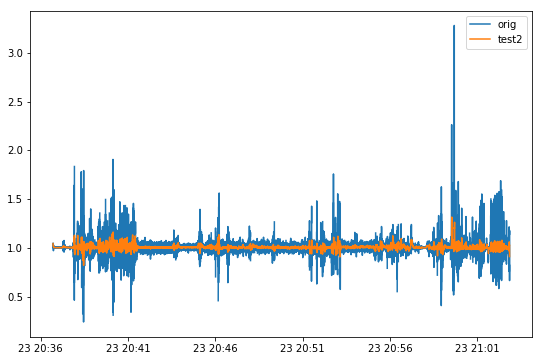

8


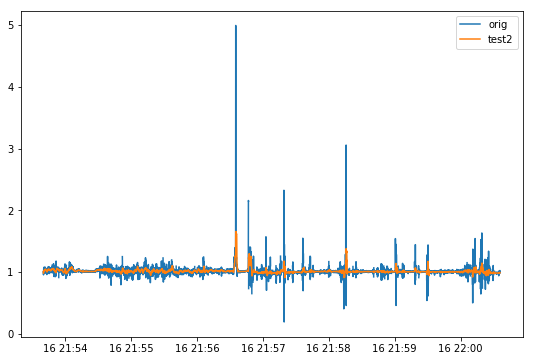

9
9 229 2015-03-16 21:54:00.997370


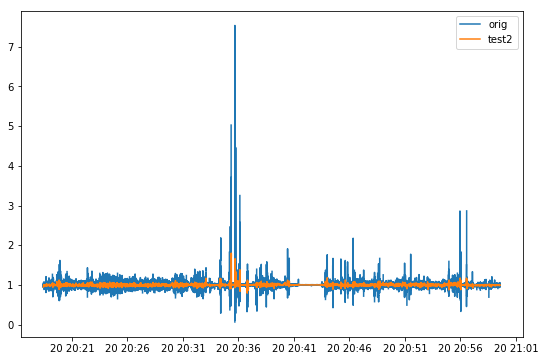

10
10 15291 2015-06-20 20:41:24.693120
10 17362 2015-06-20 20:44:31.532120


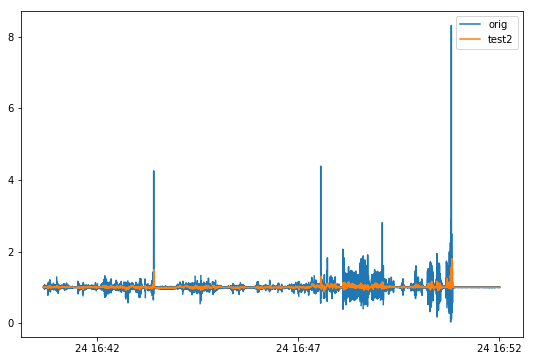

11
11 4991 2015-06-24 16:48:06.734000


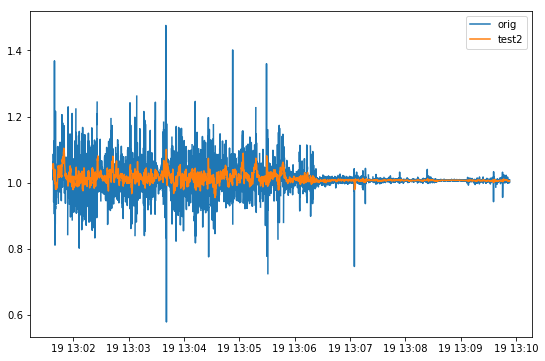

12


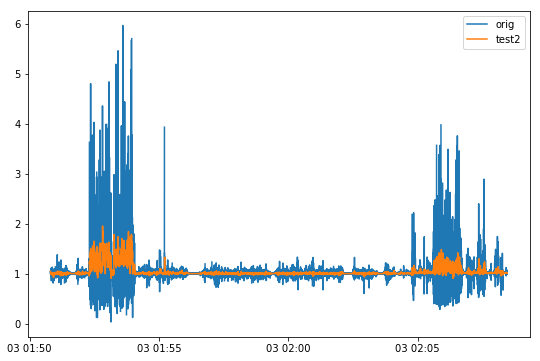

13
13 3035 2015-04-03 01:55:12.872260


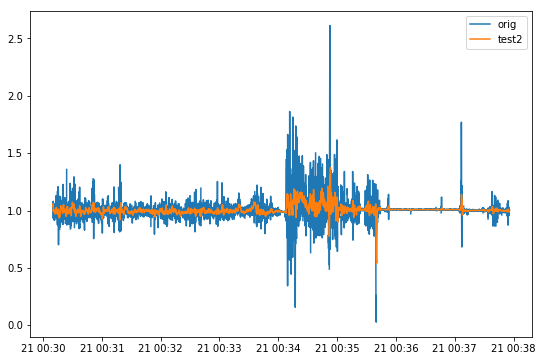

14


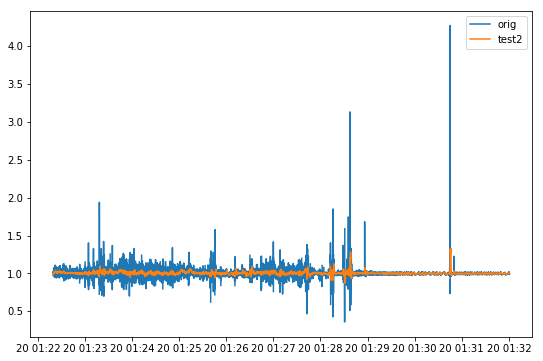

15
15 4380 2015-04-20 01:28:56.284670


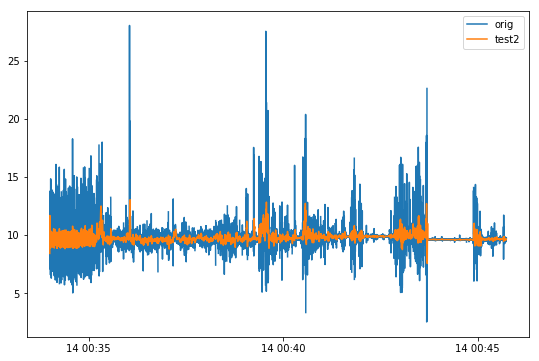

16


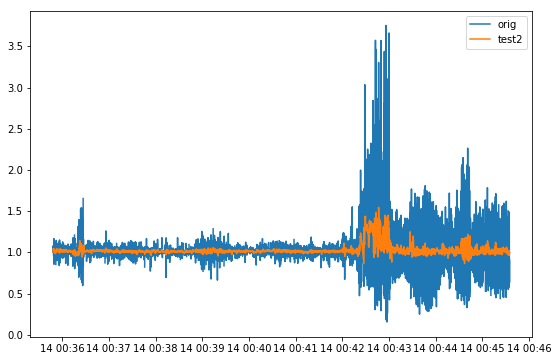

17
17 4450 2015-05-14 00:42:28.877900


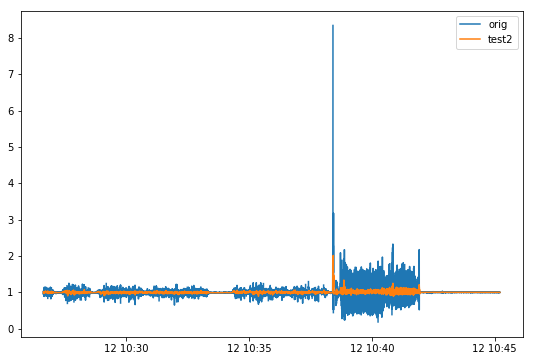

18


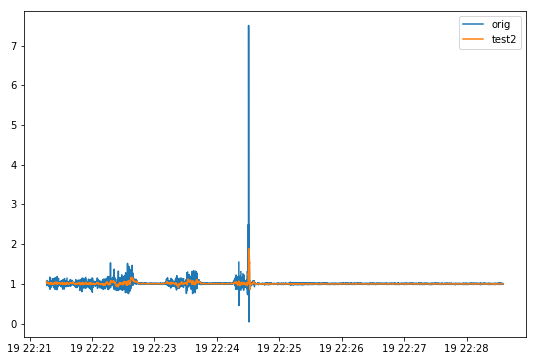

19
19 676 2015-04-19 22:22:17.788430


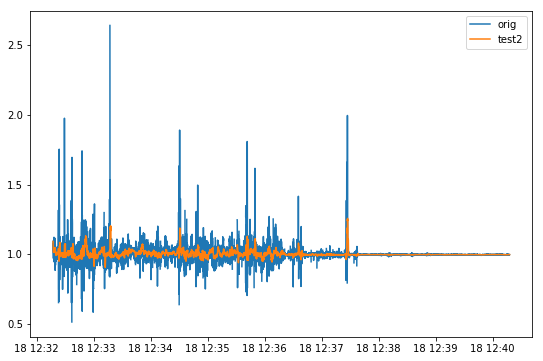

20
20 2245 2015-06-18 12:35:37.967130


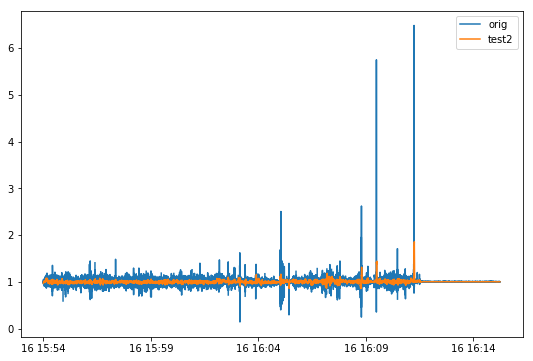

21
21 7500 2015-03-16 16:05:02.687690
21 11816 2015-03-16 16:11:23.176690


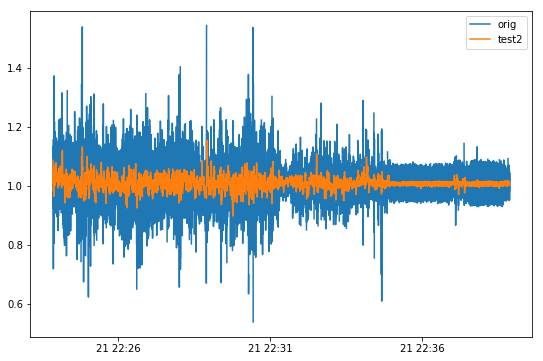

22


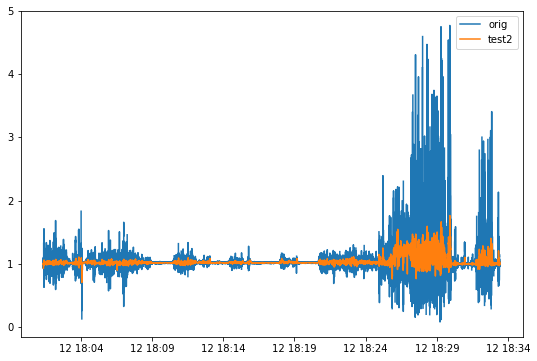

23
23 6401 2015-05-12 18:10:51.014110
23 19964 2015-05-12 18:30:56.806110


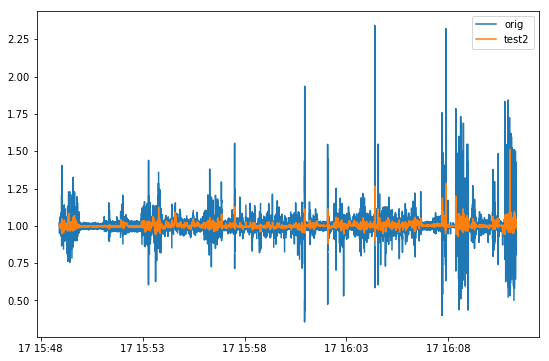

24
24 10229 2015-05-17 16:04:23.392600
24 12386 2015-05-17 16:07:40.892600
24 12569 2015-05-17 16:07:59.149600
24 12795 2015-05-17 16:08:21.698600


In [51]:
for i in range(0,25):
    test = dfs[i].sort_values(by='time')
    test = test.set_index(['time'])
    
    test2 = test.rolling('1s').mean()
    test2_std = test.rolling('1s').std()
    
    orig_df = dfs[i]
    
    plt.figure(figsize=(9,6))
    plt.plot(dfs[i].time,dfs[i].mag,label='orig')
    plt.plot(test2.index, test2.mag,label='test2')
    plt.legend()
    plt.show()
    
    print(i)
    for j in range(0,len(orig_df['type'])):
        if orig_df['mag'][j] > (test2['mag'][j]+(3*test2_std['mag'][j])):
            print(i,j,test2.index[j])

In [58]:
def Find_events(dfs, variable, window):
    for i in range(0,25):
        test = dfs[i].sort_values(by='time')
        test = test.set_index(['time'])

        test2 = test.rolling(window).mean()
        test2_std = test.rolling(window).std()

        orig_df = dfs[i][['time',variable]]
        orig_df.set_index(['time'])
        orig_df_plot = orig_df.dropna(axis=0,how='any')

        plt.figure(figsize=(9,6))
        plt.plot(orig_df_plot.time,orig_df_plot[variable],label='orig')
        plt.plot(test2.index, test2[variable],label='test2')
        plt.legend()
        plt.show()

        print(i)
        for j in range(0,len(orig_df['time'])):
            if orig_df[variable][j] > (test2[variable][j]+(3*test2_std[variable][j])):
                print(i,j,test2.index[j])
                
                


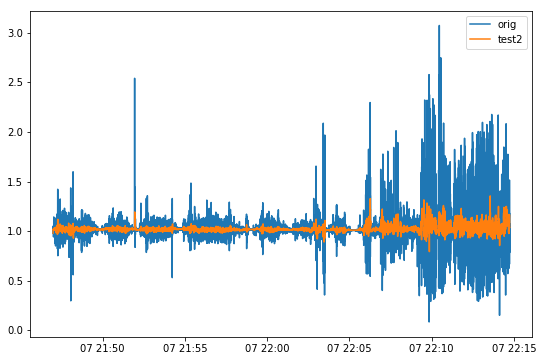

0


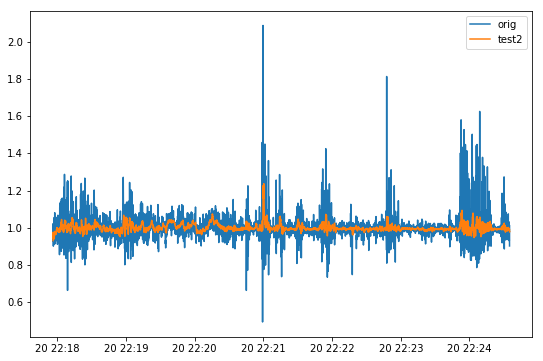

1


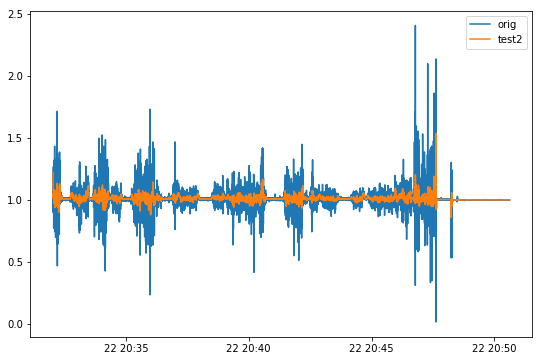

2


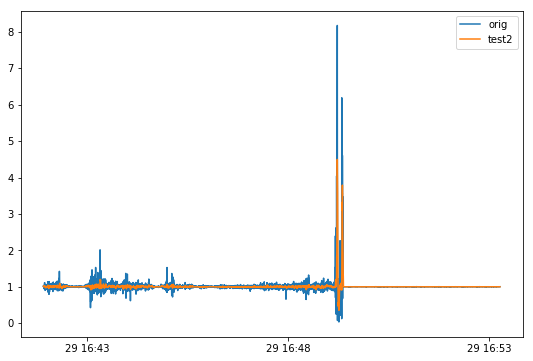

3


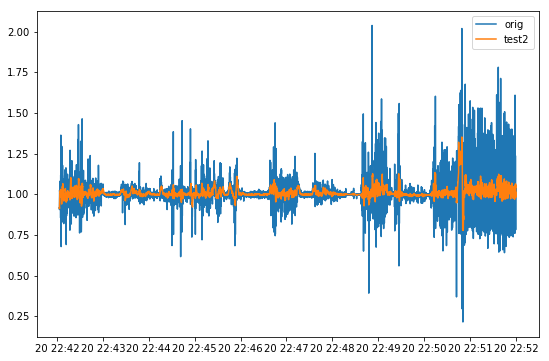

4


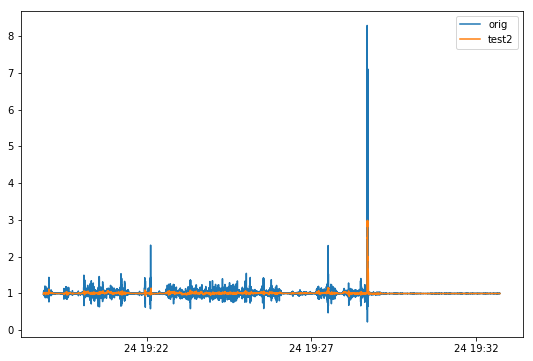

5


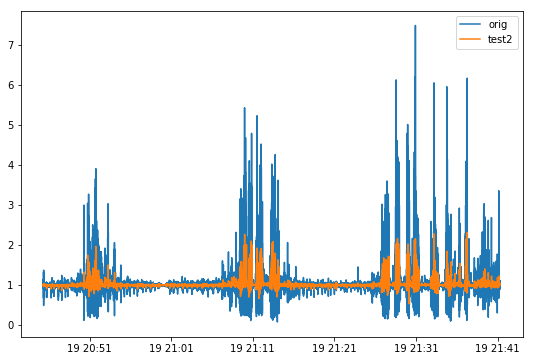

6
6 35359 2015-03-19 21:37:29.228870


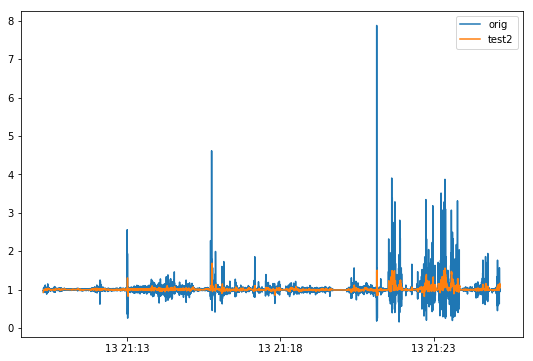

7
7 7616 2015-04-13 21:21:31.568980


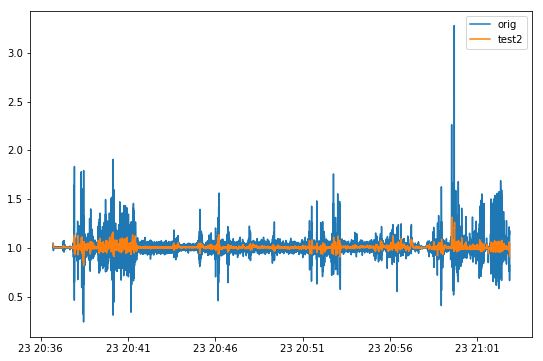

8


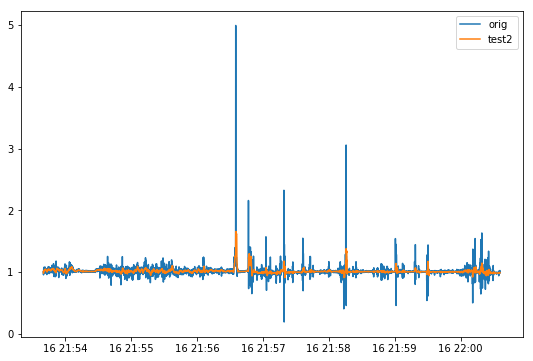

9
9 229 2015-03-16 21:54:00.997370


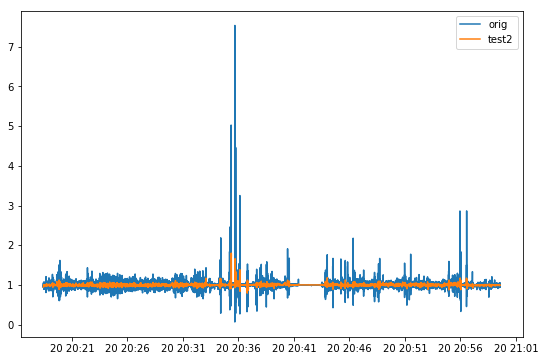

10
10 15291 2015-06-20 20:41:24.693120
10 17362 2015-06-20 20:44:31.532120


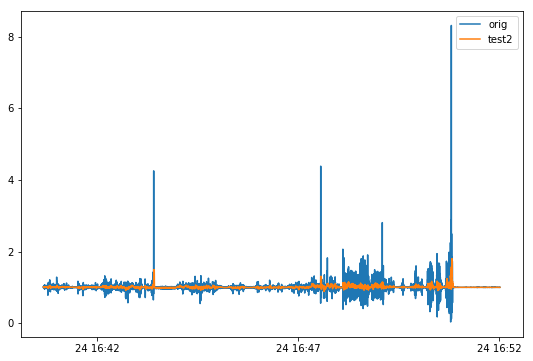

11
11 4991 2015-06-24 16:48:06.734000


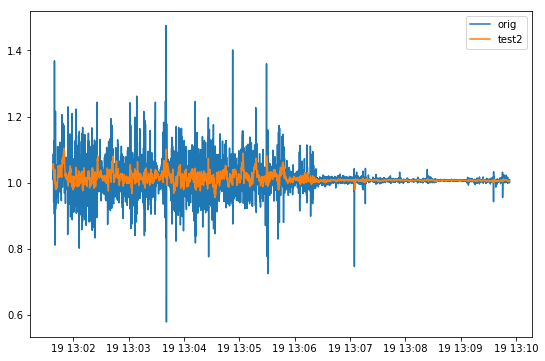

12


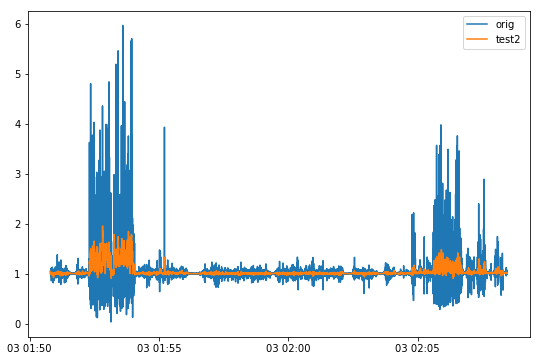

13
13 3035 2015-04-03 01:55:12.872260


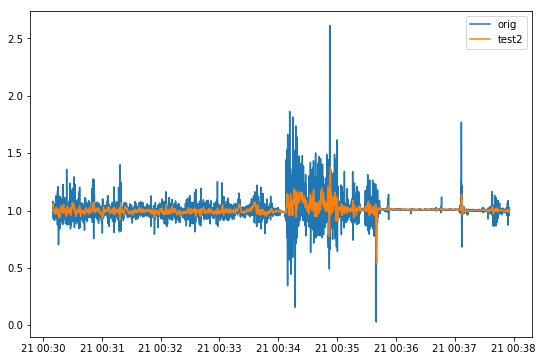

14


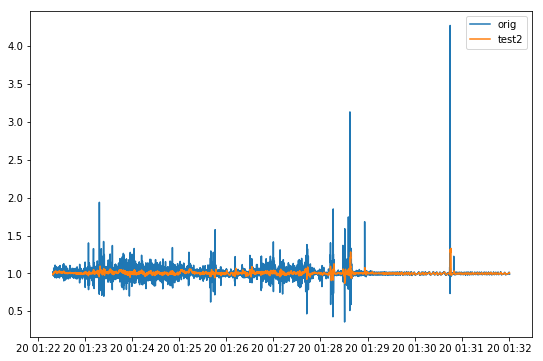

15
15 4380 2015-04-20 01:28:56.284670


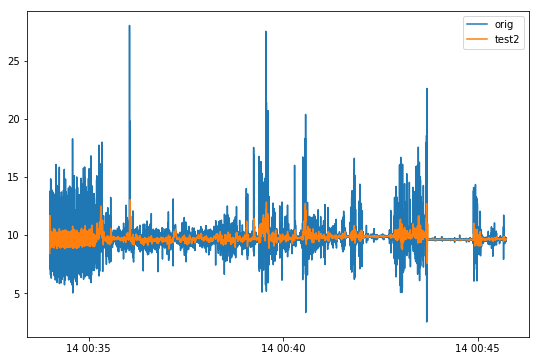

16


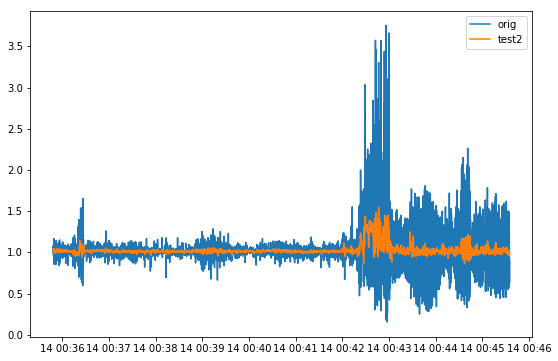

17
17 4450 2015-05-14 00:42:28.877900


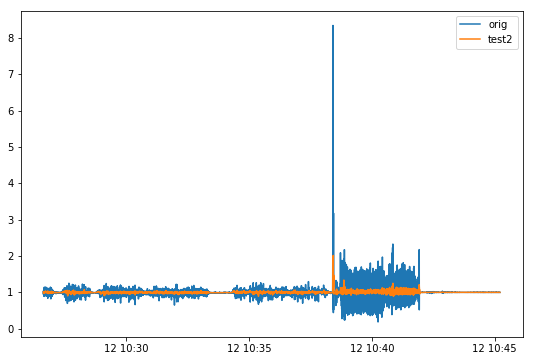

18


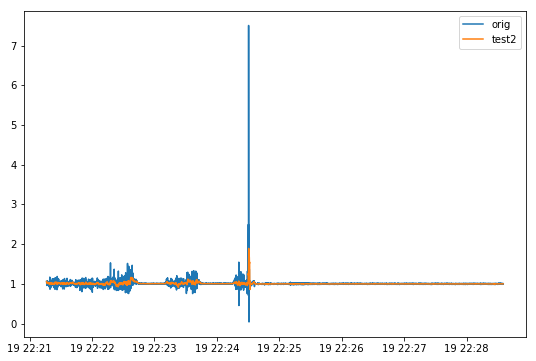

19
19 676 2015-04-19 22:22:17.788430


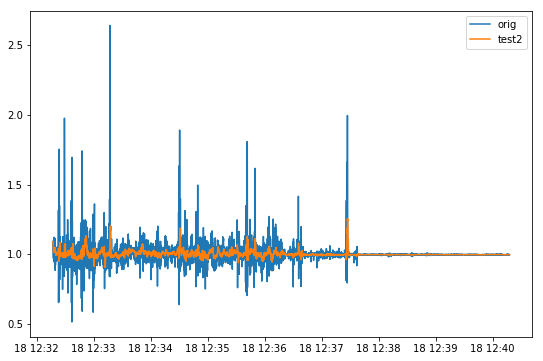

20
20 2245 2015-06-18 12:35:37.967130


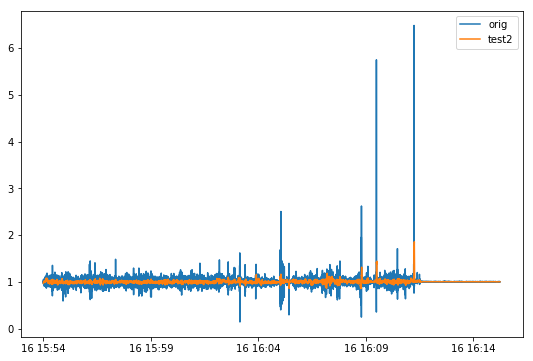

21
21 7500 2015-03-16 16:05:02.687690
21 11816 2015-03-16 16:11:23.176690


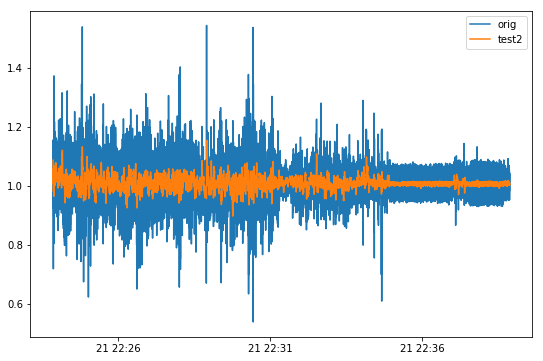

22


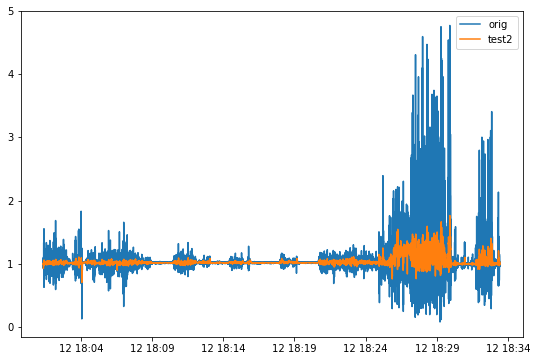

23
23 6401 2015-05-12 18:10:51.014110
23 19964 2015-05-12 18:30:56.806110


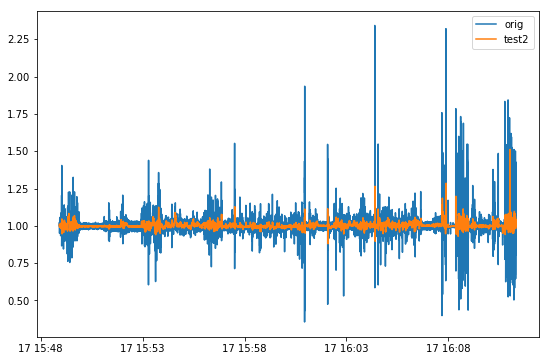

24
24 10229 2015-05-17 16:04:23.392600
24 12386 2015-05-17 16:07:40.892600
24 12569 2015-05-17 16:07:59.149600
24 12795 2015-05-17 16:08:21.698600


In [59]:
Find_events(dfs, 'mag','1s')

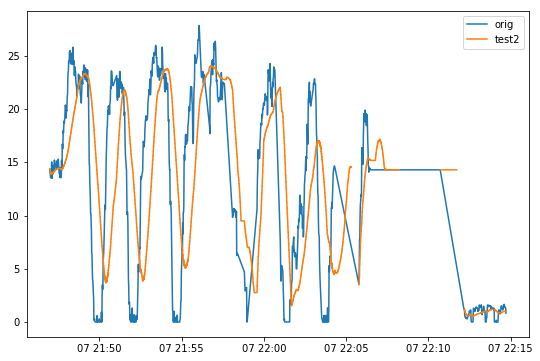

0
0 519 2015-05-07 21:47:44.698430
0 542 2015-05-07 21:47:46.690430
0 553 2015-05-07 21:47:47.699430
0 565 2015-05-07 21:47:48.697430
0 576 2015-05-07 21:47:49.694430
0 587 2015-05-07 21:47:50.697430
0 632 2015-05-07 21:47:54.697430


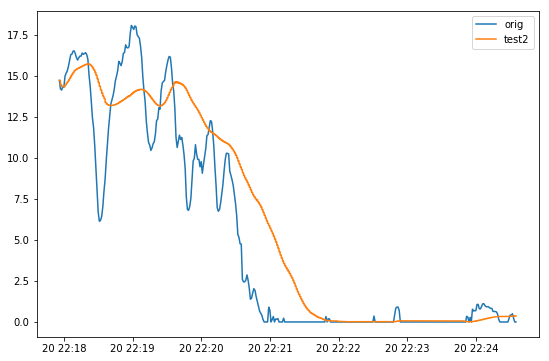

1
1 3049 2015-06-20 22:22:30.981070
1 3249 2015-06-20 22:22:49.017070
1 3260 2015-06-20 22:22:50.019070
1 3271 2015-06-20 22:22:51.005070
1 3282 2015-06-20 22:22:51.998070
1 3959 2015-06-20 22:23:53.004070
1 3981 2015-06-20 22:23:55.009070
1 4003 2015-06-20 22:23:57.013070
1 4015 2015-06-20 22:23:58.017070
1 4026 2015-06-20 22:23:59.011070
1 4037 2015-06-20 22:23:59.999070
1 4048 2015-06-20 22:24:00.995070
1 4059 2015-06-20 22:24:01.994070


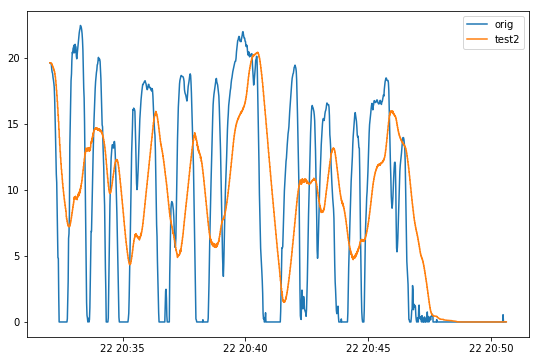

2
2 6207 2015-06-22 20:41:35.007220
2 6218 2015-06-22 20:41:35.996220
2 6229 2015-06-22 20:41:37.006220
2 6250 2015-06-22 20:41:39.026220
2 11993 2015-06-22 20:50:29.001220


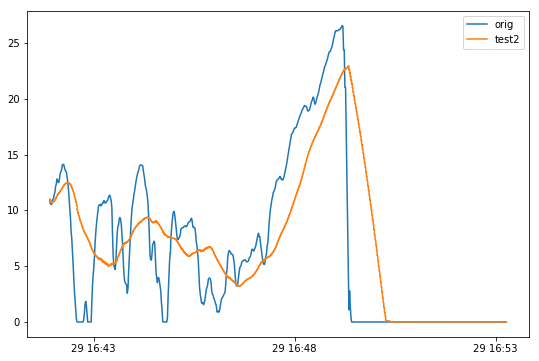

3
3 3620 2015-03-29 16:47:23.953200


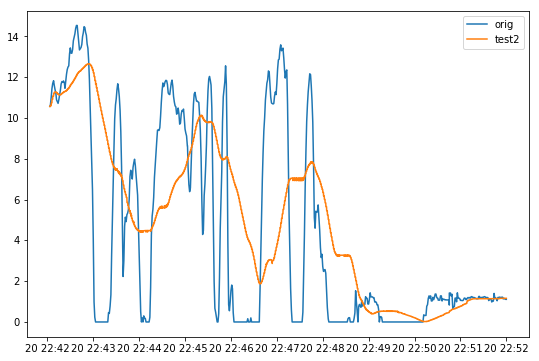

4
4 5398 2015-04-20 22:50:12.026430
4 5408 2015-04-20 22:50:12.925430
4 5419 2015-04-20 22:50:13.924430
4 5430 2015-04-20 22:50:14.944430
4 5441 2015-04-20 22:50:15.938430
4 5452 2015-04-20 22:50:16.970430
4 5463 2015-04-20 22:50:17.967430
4 5474 2015-04-20 22:50:18.967430
4 5485 2015-04-20 22:50:19.965430
4 5496 2015-04-20 22:50:20.962430
4 5529 2015-04-20 22:50:23.967430


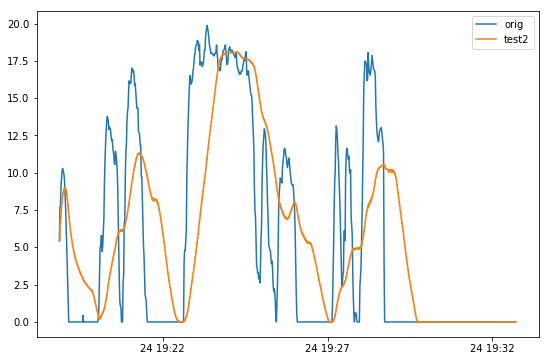

5
5 815 2015-04-24 19:20:05.996820
5 821 2015-04-24 19:20:06.473820
5 827 2015-04-24 19:20:06.993820
5 839 2015-04-24 19:20:08.015820
5 850 2015-04-24 19:20:09.008820
5 894 2015-04-24 19:20:13.013820
5 904 2015-04-24 19:20:13.983820
5 916 2015-04-24 19:20:14.990820
5 927 2015-04-24 19:20:16.014820
5 938 2015-04-24 19:20:17.005820
5 949 2015-04-24 19:20:18.012820
5 960 2015-04-24 19:20:19.018820
5 2505 2015-04-24 19:22:38.992820
5 2515 2015-04-24 19:22:39.990820
5 2527 2015-04-24 19:22:41.000820
5 2538 2015-04-24 19:22:41.999820
5 2548 2015-04-24 19:22:42.981820
5 2560 2015-04-24 19:22:44.005820
5 2571 2015-04-24 19:22:44.999820
5 2582 2015-04-24 19:22:45.985820
5 2593 2015-04-24 19:22:46.998820
5 2604 2015-04-24 19:22:47.992820
5 2614 2015-04-24 19:22:48.979820
5 2626 2015-04-24 19:22:50.009820
5 5480 2015-04-24 19:27:09.017820
5 5491 2015-04-24 19:27:10.001820
5 5502 2015-04-24 19:27:11.015820
5 5513 2015-04-24 19:27:11.967820
5 5524 2015-04-24 19:27:13.024820
5 5535 2015-04-24 19:27:

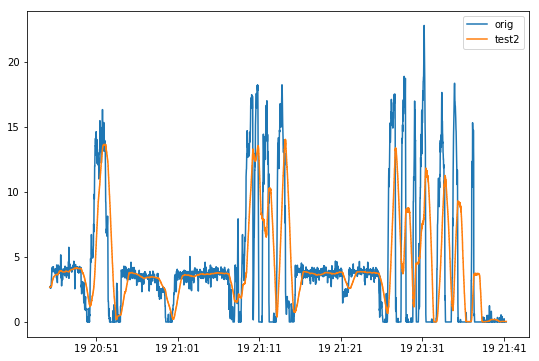

6
6 905 2015-03-19 20:46:41.005870
6 916 2015-03-19 20:46:42.004870
6 1583 2015-03-19 20:47:41.010870
6 3391 2015-03-19 20:50:20.991870
6 3459 2015-03-19 20:50:26.995870
6 5550 2015-03-19 20:53:32.014870
6 5561 2015-03-19 20:53:33.013870
6 5573 2015-03-19 20:53:34.011870
6 5584 2015-03-19 20:53:35.013870
6 5595 2015-03-19 20:53:36.008870
6 5934 2015-03-19 20:54:05.998870
6 10297 2015-03-19 21:00:31.999870
6 10308 2015-03-19 21:00:33.015870
6 10320 2015-03-19 21:00:34.024870
6 10365 2015-03-19 21:00:38.034870
6 10376 2015-03-19 21:00:39.006870
6 10387 2015-03-19 21:00:40.002870
6 11641 2015-03-19 21:02:30.987870
6 12907 2015-03-19 21:04:22.984870
6 15630 2015-03-19 21:08:24.003870
6 15642 2015-03-19 21:08:25.331870
6 18871 2015-03-19 21:13:10.999870
6 18883 2015-03-19 21:13:12.009870
6 18894 2015-03-19 21:13:13.009870
6 18905 2015-03-19 21:13:14.016870
6 18917 2015-03-19 21:13:15.015870
6 18928 2015-03-19 21:13:15.990870
6 18939 2015-03-19 21:13:16.989870
6 18950 2015-03-19 21:13:17.998

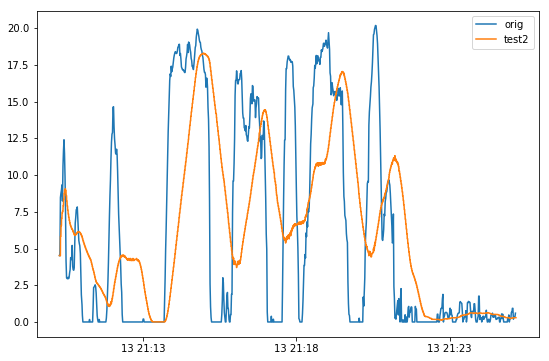

7
7 1105 2015-04-13 21:11:53.988980
7 1116 2015-04-13 21:11:54.979980
7 1127 2015-04-13 21:11:55.982980
7 1138 2015-04-13 21:11:56.980980
7 1150 2015-04-13 21:11:57.981980
7 1161 2015-04-13 21:11:58.976980
7 1172 2015-04-13 21:11:59.981980
7 1183 2015-04-13 21:12:00.976980
7 2322 2015-04-13 21:13:42.015980
7 2333 2015-04-13 21:13:43.011980
7 2344 2015-04-13 21:13:43.996980
7 2355 2015-04-13 21:13:45.007980
7 2367 2015-04-13 21:13:46.021980
7 2378 2015-04-13 21:13:46.993980
7 2389 2015-04-13 21:13:48.019980
7 2400 2015-04-13 21:13:49.012980
7 2412 2015-04-13 21:13:50.013980
7 2423 2015-04-13 21:13:51.022980
7 2434 2015-04-13 21:13:52.005980
7 2446 2015-04-13 21:13:53.022980
7 8454 2015-04-13 21:22:46.017980
7 8466 2015-04-13 21:22:47.003980


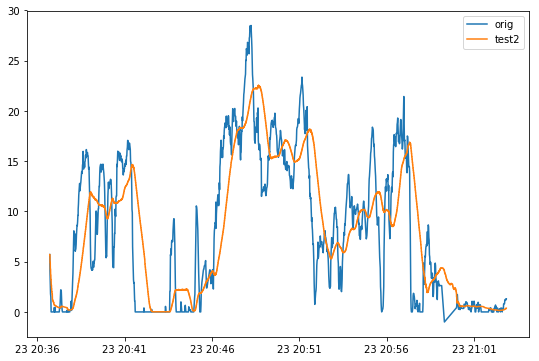

8
8 872 2015-06-23 20:37:59.973510
8 884 2015-06-23 20:38:00.992510
8 895 2015-06-23 20:38:01.996510
8 906 2015-06-23 20:38:02.987510
8 917 2015-06-23 20:38:03.989510
8 929 2015-06-23 20:38:05.013510
8 939 2015-06-23 20:38:05.977510
8 962 2015-06-23 20:38:07.978510
8 4444 2015-06-23 20:43:20.005510
8 4611 2015-06-23 20:43:34.983510
8 4622 2015-06-23 20:43:35.992510
8 4633 2015-06-23 20:43:36.996510
8 4644 2015-06-23 20:43:37.984510
8 4655 2015-06-23 20:43:39.015510
8 4666 2015-06-23 20:43:39.992510
8 4678 2015-06-23 20:43:40.991510
8 4689 2015-06-23 20:43:41.996510
8 4700 2015-06-23 20:43:43.012510
8 5547 2015-06-23 20:44:58.996510
8 5559 2015-06-23 20:45:00.026510
8 5569 2015-06-23 20:45:00.991510
8 5580 2015-06-23 20:45:01.980510
8 5592 2015-06-23 20:45:02.998510
8 5603 2015-06-23 20:45:03.999510
8 5614 2015-06-23 20:45:05.016510
8 5625 2015-06-23 20:45:05.994510
8 5637 2015-06-23 20:45:07.032510
8 5648 2015-06-23 20:45:08.066510
8 6372 2015-06-23 20:46:12.981510
8 12273 2015-06-23 2

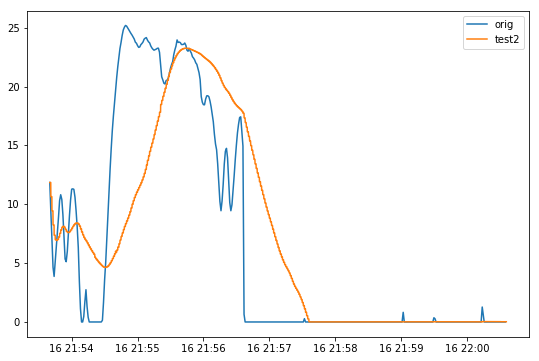

9
9 3528 2015-03-16 21:59:01.986370
9 4317 2015-03-16 22:00:13.977370


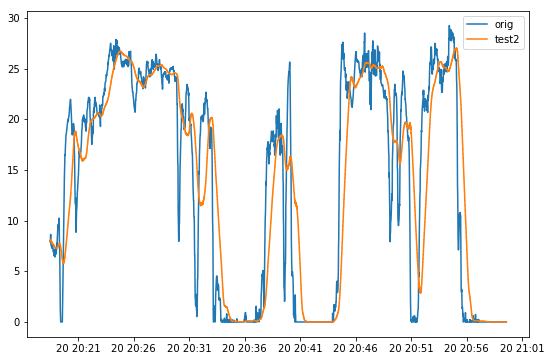

10
10 11655 2015-06-20 20:35:56.962120
10 11666 2015-06-20 20:35:57.964120
10 11678 2015-06-20 20:35:58.971120
10 11689 2015-06-20 20:35:59.967120
10 11700 2015-06-20 20:36:00.970120
10 11711 2015-06-20 20:36:01.973120
10 11722 2015-06-20 20:36:02.978120
10 11733 2015-06-20 20:36:03.983120
10 11744 2015-06-20 20:36:04.976120
10 12376 2015-06-20 20:37:01.979120
10 12676 2015-06-20 20:37:29.002120
10 12687 2015-06-20 20:37:30.004120
10 12698 2015-06-20 20:37:31.004120
10 12709 2015-06-20 20:37:32.000120
10 12720 2015-06-20 20:37:33.002120
10 12731 2015-06-20 20:37:33.985120
10 12742 2015-06-20 20:37:34.975120
10 12898 2015-06-20 20:37:49.002120
10 12909 2015-06-20 20:37:49.980120
10 12920 2015-06-20 20:37:50.959120
10 12931 2015-06-20 20:37:51.978120
10 12942 2015-06-20 20:37:52.980120
10 12953 2015-06-20 20:37:53.989120
10 12964 2015-06-20 20:37:54.988120
10 16958 2015-06-20 20:43:54.977120
10 16969 2015-06-20 20:43:55.984120
10 17025 2015-06-20 20:44:00.979120
10 17036 2015-06-20 20:44

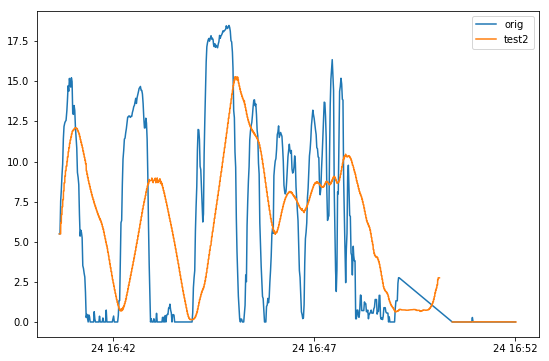

11
11 1027 2015-06-24 16:42:11.943000
11 1039 2015-06-24 16:42:12.964000
11 1050 2015-06-24 16:42:13.963000
11 1061 2015-06-24 16:42:14.976000
11 1072 2015-06-24 16:42:15.988000
11 1084 2015-06-24 16:42:17.017000
11 1095 2015-06-24 16:42:18.005000
11 1106 2015-06-24 16:42:18.980000
11 2234 2015-06-24 16:43:59.945000
11 2245 2015-06-24 16:44:00.940000
11 2256 2015-06-24 16:44:01.948000
11 2268 2015-06-24 16:44:02.954000
11 2279 2015-06-24 16:44:03.949000
11 2290 2015-06-24 16:44:04.989000
11 2301 2015-06-24 16:44:05.960000
11 2312 2015-06-24 16:44:06.941000
11 2323 2015-06-24 16:44:07.953000
11 2334 2015-06-24 16:44:08.940000
11 5642 2015-06-24 16:49:04.976000
11 5653 2015-06-24 16:49:05.939000
11 5664 2015-06-24 16:49:06.937000
11 6804 2015-06-24 16:50:56.001000


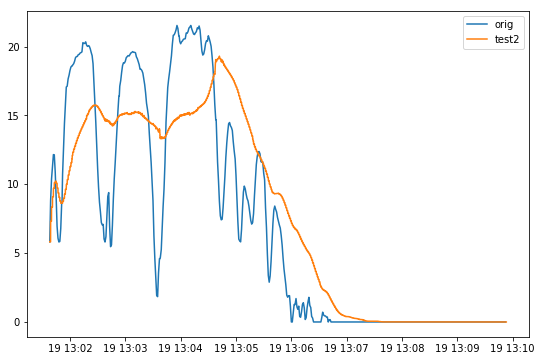

12


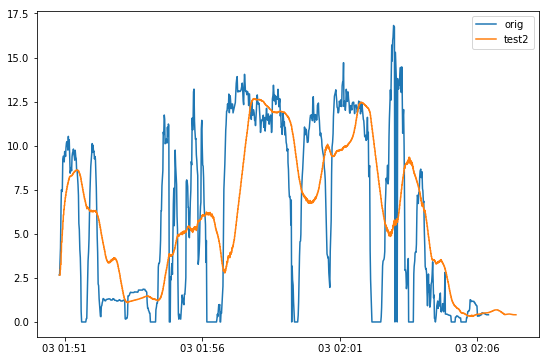

13
13 2531 2015-04-03 01:54:29.059260
13 2542 2015-04-03 01:54:30.069260
13 2552 2015-04-03 01:54:30.928260
13 2565 2015-04-03 01:54:32.065260
13 2576 2015-04-03 01:54:32.958260
13 2588 2015-04-03 01:54:34.030260
13 2598 2015-04-03 01:54:34.888260
13 2610 2015-04-03 01:54:35.923260
13 2623 2015-04-03 01:54:37.087260


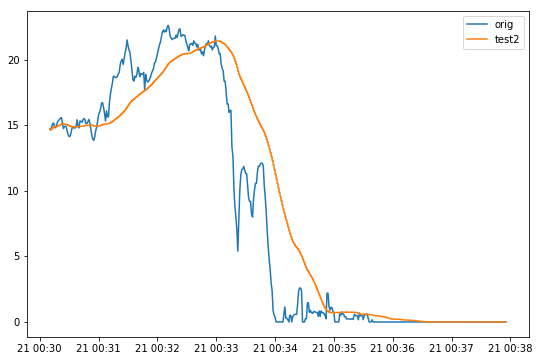

14
14 574 2015-06-21 00:31:02.998950
14 672 2015-06-21 00:31:12.005950
14 683 2015-06-21 00:31:13.045950
14 694 2015-06-21 00:31:14.046950
14 705 2015-06-21 00:31:15.056950
14 715 2015-06-21 00:31:15.985950


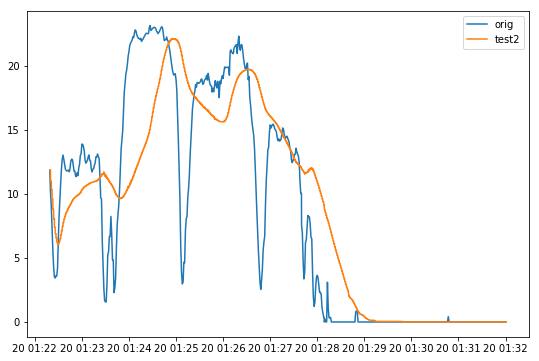

15
15 5599 2015-04-20 01:30:47.003670


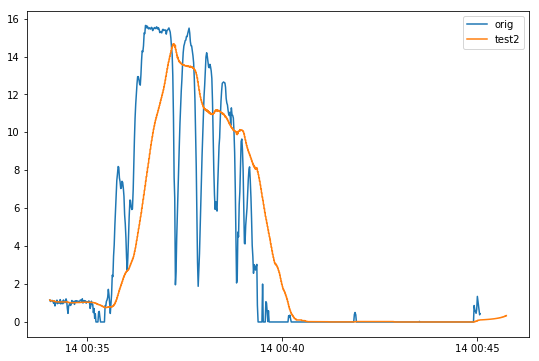

16
16 1049 2015-03-14 00:35:38.960670
16 1071 2015-03-14 00:35:40.968670
16 1081 2015-03-14 00:35:41.956670
16 1092 2015-03-14 00:35:42.980670
16 1102 2015-03-14 00:35:43.965670
16 1113 2015-03-14 00:35:44.961670
16 1124 2015-03-14 00:35:45.969670
16 1134 2015-03-14 00:35:46.959670
16 1145 2015-03-14 00:35:47.977670
16 1156 2015-03-14 00:35:48.957670
16 5000 2015-03-14 00:41:51.023670
16 5011 2015-03-14 00:41:52.007670
16 5023 2015-03-14 00:41:53.117670
16 6064 2015-03-14 00:43:30.986670
16 6958 2015-03-14 00:44:55.013670
16 6969 2015-03-14 00:44:56.013670
16 6979 2015-03-14 00:44:56.976670
16 7000 2015-03-14 00:44:58.976670
16 7011 2015-03-14 00:44:59.972670
16 7021 2015-03-14 00:45:00.977670


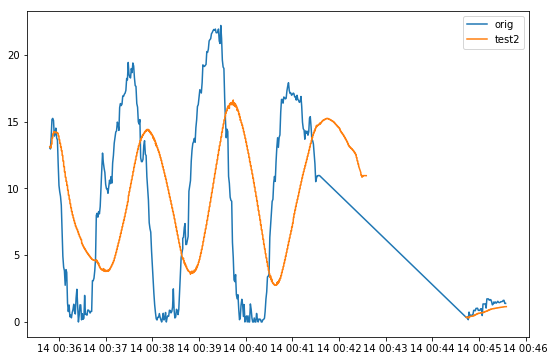

17


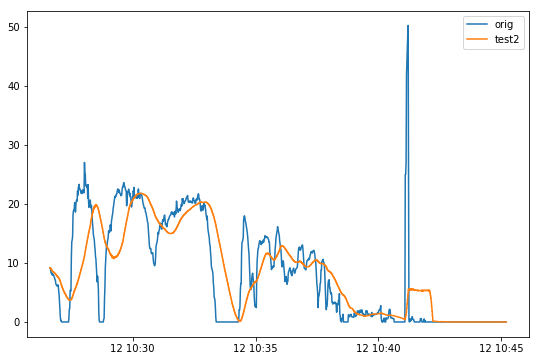

18
18 5106 2015-01-12 10:34:21.990680
18 5117 2015-01-12 10:34:23.000680
18 5128 2015-01-12 10:34:24.006680
18 5139 2015-01-12 10:34:24.991680
18 5150 2015-01-12 10:34:26.010680
18 5161 2015-01-12 10:34:27.017680
18 5172 2015-01-12 10:34:27.997680
18 5183 2015-01-12 10:34:29.001680
18 5194 2015-01-12 10:34:30.008680
18 5205 2015-01-12 10:34:31.002680
18 5216 2015-01-12 10:34:32.002680
18 8882 2015-01-12 10:40:05.997680
18 9541 2015-01-12 10:41:05.996680
18 9552 2015-01-12 10:41:06.989680
18 9563 2015-01-12 10:41:08.001680
18 9574 2015-01-12 10:41:09.007680
18 9585 2015-01-12 10:41:10.007680
18 9596 2015-01-12 10:41:11.011680
18 9607 2015-01-12 10:41:12.001680
18 9618 2015-01-12 10:41:12.980680


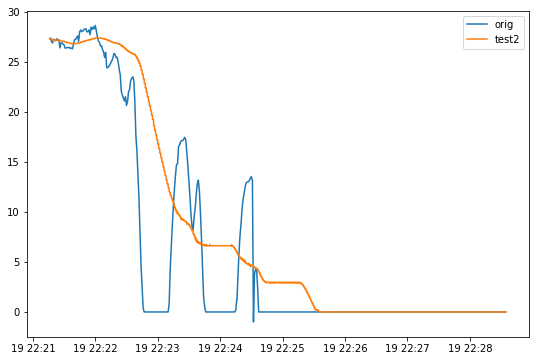

19


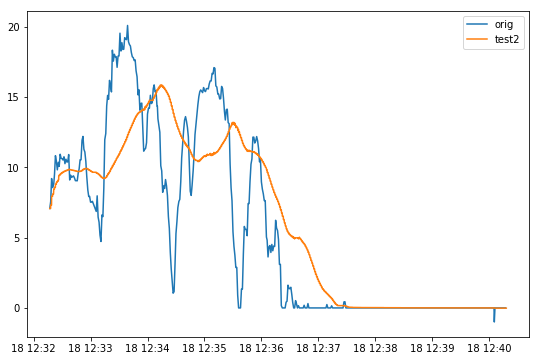

20
20 684 2015-06-18 12:33:17.976130
20 706 2015-06-18 12:33:19.978130
20 740 2015-06-18 12:33:22.989130


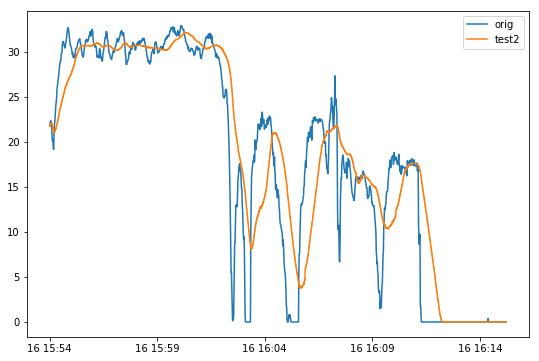

21
21 13841 2015-03-16 16:14:22.989690


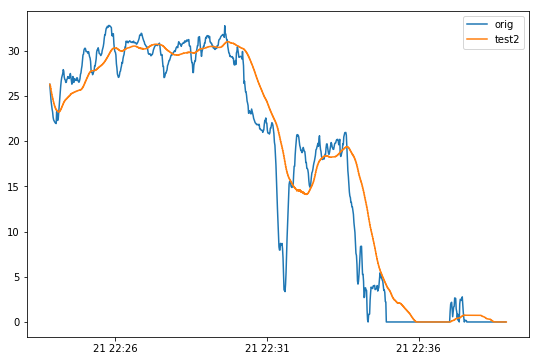

22
22 8917 2015-03-21 22:37:02.023000
22 8928 2015-03-21 22:37:03.033000
22 8939 2015-03-21 22:37:04.024000
22 8950 2015-03-21 22:37:04.999000
22 9018 2015-03-21 22:37:10.999000
22 9030 2015-03-21 22:37:12.011000


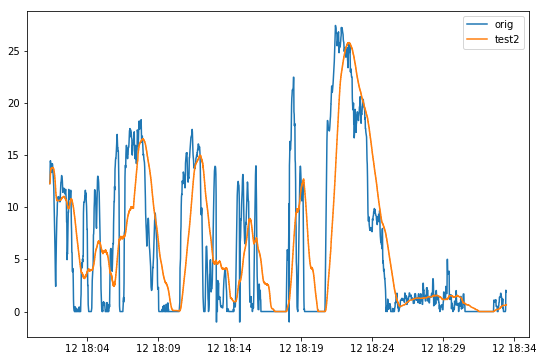

23
23 6165 2015-05-12 18:10:29.989110
23 6176 2015-05-12 18:10:30.988110
23 6187 2015-05-12 18:10:31.992110
23 6199 2015-05-12 18:10:32.996110
23 6211 2015-05-12 18:10:34.050110
23 6221 2015-05-12 18:10:35.020110
23 6232 2015-05-12 18:10:35.992110
23 6244 2015-05-12 18:10:36.989110
23 6255 2015-05-12 18:10:38.013110
23 6266 2015-05-12 18:10:39.005110
23 6277 2015-05-12 18:10:39.999110
23 8855 2015-05-12 18:14:28.954110
23 8866 2015-05-12 18:14:29.961110
23 8878 2015-05-12 18:14:30.998110
23 8889 2015-05-12 18:14:32.002110
23 8901 2015-05-12 18:14:33.015110
23 8912 2015-05-12 18:14:33.997110
23 11217 2015-05-12 18:17:58.984110
23 11229 2015-05-12 18:18:00.004110
23 11240 2015-05-12 18:18:01.016110
23 11251 2015-05-12 18:18:01.996110
23 11263 2015-05-12 18:18:02.986110
23 11274 2015-05-12 18:18:03.984110
23 11285 2015-05-12 18:18:04.980110
23 11330 2015-05-12 18:18:08.993110
23 11342 2015-05-12 18:18:09.994110
23 11364 2015-05-12 18:18:11.985110
23 11375 2015-05-12 18:18:12.997110
23 113

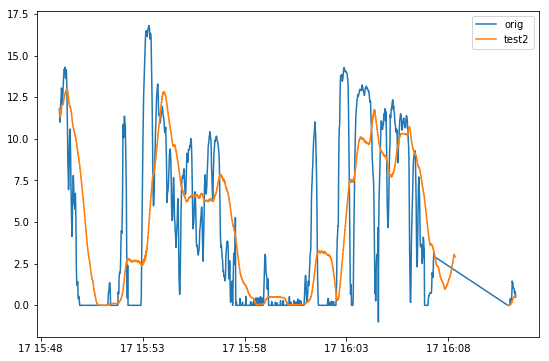

24
24 1586 2015-05-17 15:51:18.970600
24 1597 2015-05-17 15:51:19.971600
24 1608 2015-05-17 15:51:20.983600
24 1619 2015-05-17 15:51:21.974600
24 1630 2015-05-17 15:51:22.974600
24 1641 2015-05-17 15:51:23.981600
24 1939 2015-05-17 15:51:51.021600
24 1947 2015-05-17 15:51:51.767600
24 1952 2015-05-17 15:51:52.163600
24 1962 2015-05-17 15:51:53.030600
24 1984 2015-05-17 15:51:55.029600
24 1995 2015-05-17 15:51:56.021600
24 2005 2015-05-17 15:51:56.995600
24 2017 2015-05-17 15:51:58.018600
24 2028 2015-05-17 15:51:59.022600
24 2039 2015-05-17 15:52:00.036600
24 2050 2015-05-17 15:52:01.041600
24 2061 2015-05-17 15:52:02.030600
24 2072 2015-05-17 15:52:03.047600
24 2083 2015-05-17 15:52:04.069600
24 2096 2015-05-17 15:52:05.283600
24 2105 2015-05-17 15:52:06.034600
24 6411 2015-05-17 15:58:36.985600
24 6631 2015-05-17 15:58:56.968600
24 6642 2015-05-17 15:58:57.968600
24 6653 2015-05-17 15:58:58.969600
24 6664 2015-05-17 15:58:59.964600
24 6675 2015-05-17 15:59:00.966600
24 6686 2015-05-1

In [62]:
Find_events(dfs, 'speed','60s')

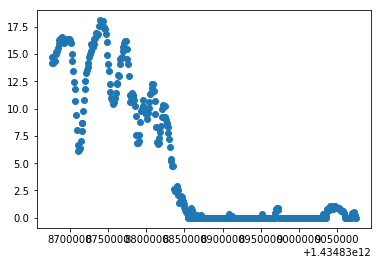

In [25]:
plt.scatter(dfs[1].timestamp, dfs[1].speed)

In [48]:
test3 = dfs[1][['time','speed']]
test3.set_index(['time'])
test3 = test3.dropna(axis=0,how='any')

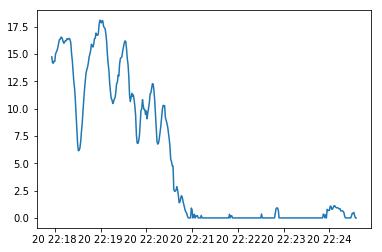

In [49]:
plt.plot(test3.time, test3.speed)

In [ ]:
Find_events()